In [2]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [4]:
ticker = 'PG' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

log_returns = np.log(1 + data.pct_change())

In [5]:
log_returns.tail()

,PG
Date,
2021-11-08,-0.007492
2021-11-09,0.003031
2021-11-10,0.009788
2021-11-11,-0.002865
2021-11-12,0.001092


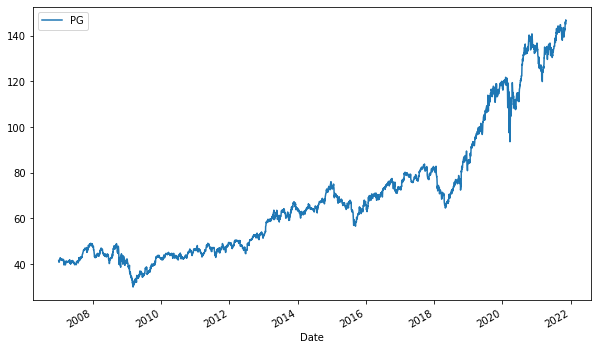

In [6]:
data.plot(figsize=(10, 6));

<AxesSubplot:xlabel='Date'>

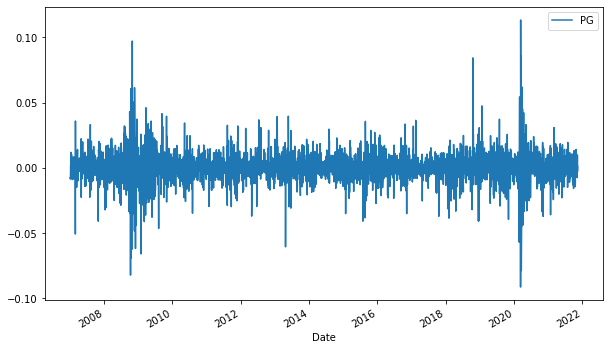

In [7]:
log_returns.plot(figsize = (10, 6))

In [8]:
u = log_returns.mean()
u

PG    0.000337
dtype: float64

In [9]:
var = log_returns.var()
var

PG    0.000137
dtype: float64

In [10]:
drift = u - (0.5 * var)
drift

PG    0.000268
dtype: float64

In [11]:
stdev = log_returns.std()
stdev

PG    0.011723
dtype: float64

******

In [12]:
type(drift)

pandas.core.series.Series

In [13]:
type(stdev)

pandas.core.series.Series

In [14]:
np.array(drift)

array([0.0002678])

In [15]:
drift.values

array([0.0002678])

In [16]:
stdev.values

array([0.01172327])

In [17]:
norm.ppf(0.95)# z corresponds to the distance b/w the mean and event, expressed as the num of std deviation
 # if an event has 95% chance of occuring then the distance b/w the mean and this std dev would be 1.65 std deviations

1.6448536269514722

In [18]:
x = np.random.rand(10, 2)
x

array([[0.08663977, 0.27531182],
       [0.09783952, 0.77814996],
       [0.30423568, 0.80395806],
       [0.86533451, 0.63506474],
       [0.51577211, 0.95587701],
       [0.50026896, 0.32148762],
       [0.97491516, 0.15523039],
       [0.10640578, 0.81907709],
       [0.68371949, 0.51272216],
       [0.41422592, 0.24919102]])

In [19]:
norm.ppf(x) # for each of the randomly generated probablilty we will get distance from mean 

array([[-1.36174132e+00, -5.96825881e-01],
       [-1.29396055e+00,  7.65960044e-01],
       [-5.12256713e-01,  8.55844353e-01],
       [ 1.10460454e+00,  3.45297767e-01],
       [ 3.95451234e-02,  1.70472359e+00],
       [ 6.74178294e-04, -4.63542953e-01],
       [ 1.95851435e+00, -1.01425564e+00],
       [-1.24587154e+00,  9.11853547e-01],
       [ 4.78125319e-01,  3.18951290e-02],
       [-2.16687577e-01, -6.77037682e-01]])

In [21]:
Z = norm.ppf(np.random.rand(10,2)) # for each of the randomly generated probablity  from the mean 0 we get distance
Z

array([[ 1.24350715,  1.77178186],
       [-0.39194985, -0.45341066],
       [ 1.39793411, -0.72222538],
       [-0.25291637, -0.53312508],
       [ 2.05770755, -0.56248083],
       [ 0.35675588,  0.15589849],
       [-1.09436993, -0.20853716],
       [ 0.2883071 ,  2.27555858],
       [-0.1569438 , -0.87618758],
       [-0.71767124, -0.03398374]])

In [22]:
t_intervals = 1000 # for upcoming 1000 days
iterations = 10  # to get 10 series of future stock predicitions

$$
daily\_returns = e^{r}
$$

$$
r = drift + stdev \cdot z
$$

In [23]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [24]:
daily_returns

array([[1.00408864, 0.99384514, 0.99093694, ..., 1.00069256, 0.97858323,
        1.005951  ],
       [1.01509785, 1.02101438, 0.9711659 , ..., 1.00372433, 1.00618998,
        0.98528011],
       [0.98039716, 1.01289855, 1.00352912, ..., 0.99591281, 0.97210548,
        0.99136176],
       ...,
       [1.00501894, 0.99388709, 1.00123571, ..., 0.98249061, 0.99304474,
        1.00505967],
       [0.98376325, 1.00051446, 0.99798105, ..., 1.00206152, 0.98634956,
        0.98666212],
       [0.99135086, 0.9960972 , 0.97229908, ..., 1.02167031, 1.00527807,
        1.00853761]])

In [ ]:
# we got 1000 by 10 array with daily return values
# 10 sets of random future stock prices